# Run Differential Model - Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pickle

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows',500)

In [2]:
games = pd.read_csv('../Data/Created/train.csv')
games.head()

,date,visitor_team,v_league,v_game_num,home_team,h_league,h_game_num,v_runs,h_runs,total_outs,day_night,park_id,attndnce,game_mins,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,vis_mngr_name,hom_mngr_name,win_pitcher_name,lose_pitch_name,sve_pitch_name,gwrbi_name,run_diff,season,total,v_1b,h_1b,v_tbs,h_tbs,h_W/L,v_W/L,W,L,h_roll_abs,h_roll_hits,h_roll_1b,h_roll_2b,h_roll_3b,h_roll_hr,h_roll_rbis,h_roll_tbs,h_roll_hbp,h_roll_bb,h_roll_ibb,h_roll_runs,h_roll_k,h_roll_sb,h_roll_cs,h_roll_lob,h_roll_p_used,h_roll_team_er,h_roll_errors,h_roll_dp,v_roll_abs,v_roll_hits,v_roll_1b,v_roll_2b,v_roll_3b,v_roll_hr,v_roll_rbis,v_roll_tbs,v_roll_hbp,v_roll_bb,v_roll_ibb,v_roll_runs,v_roll_k,v_roll_sb,v_roll_cs,v_roll_lob,v_roll_p_used,v_roll_team_er,v_roll_errors,v_roll_dp,v_ba,h_ba,v_obp,h_obp,v_slg,h_slg,v_ops,h_ops,v_k_rat,h_k_rat,v_bb_rat,h_bb_rat,v_sb_rat,h_sb_rat
0,19890403,BOS,0,1,BAL,0,1,4,5,64,0,BAL11,52161.0,232,40,10,3,0,1,4,2,0,0,3,1,5,1,1,0,8,5,5,5,0,0,31,14,0,0,2,0,40,12,2,0,1,5,0,0,0,4,0,7,1,1,2,8,3,4,4,0,0,33,13,0,1,0,0,Joe Morgan,Frank Robinson,Brian Holton,Bob Stanley,(none),Craig Worthington,1,1989,9,6,9,16,17,W,L,BAL,BOS,677.0,170.0,121.0,35.0,3.0,11.0,70.0,244.0,3.0,70.0,9.0,71.0,116.0,11.0,6.0,156.0,58.0,81.0,7.0,21.0,706.0,179.0,119.0,34.0,7.0,19.0,94.0,284.0,3.0,79.0,8.0,100.0,105.0,17.0,5.0,144.0,60.0,91.0,12.0,17.0,0.250,0.300,0.350,0.400,0.400,0.425,0.750,0.825,0.125000,0.175000,0.100,0.100,0.10,0.10
1,19890403,MIL,0,1,CLE,0,1,1,2,51,0,CLE07,40618.0,124,30,5,0,0,0,1,1,0,0,0,0,7,0,1,0,3,1,1,1,0,0,24,10,1,0,1,0,31,8,1,0,0,2,0,0,0,1,0,4,0,0,0,6,2,1,1,0,0,27,9,0,0,0,0,Tom Trebelhorn,Doc Edwards,Greg Swindell,Don August,Doug Jones,Oddibe McDowell,1,1989,3,5,7,5,9,W,L,CLE,MIL,661.0,166.0,124.0,28.0,2.0,12.0,66.0,234.0,6.0,54.0,0.0,74.0,91.0,7.0,5.0,131.0,52.0,71.0,14.0,22.0,652.0,143.0,101.0,21.0,3.0,18.0,61.0,224.0,10.0,47.0,3.0,63.0,83.0,13.0,11.0,118.0,51.0,79.0,18.0,19.0,0.167,0.258,0.167,0.290,0.167,0.290,0.334,0.580,0.233333,0.129032,0.000,0.032,0.00,0.03
2,19890403,TOR,0,1,KCA,0,1,4,3,54,0,KAN06,38595.0,157,36,10,3,1,0,4,0,1,0,1,0,5,0,0,0,7,3,3,3,0,0,27,9,0,0,1,0,34,9,4,0,0,3,1,0,0,1,0,6,1,0,1,6,2,4,4,0,0,27,10,0,0,0,0,Jimy Williams,John Wathan,Jimmy Key,Mark Gubicza,Tom Henke,Ernie Whitt,-1,1989,7,6,5,15,13,L,W,TOR,KCA,652.0,170.0,133.0,26.0,2.0,9.0,74.0,227.0,1.0,69.0,4.0,81.0,101.0,21.0,8.0,132.0,50.0,55.0,13.0,17.0,696.0,171.0,120.0,24.0,6.0,21.0,84.0,270.0,5.0,57.0,1.0,88.0,147.0,14.0,8.0,127.0,59.0,84.0,26.0,24.0,0.278,0.265,0.306,0.294,0.417,0.382,0.723,0.676,0.138889,0.176471,0.028,0.029,0.03,0.03
3,19890403,SEA,0,1,OAK,0,1,2,3,51,1,OAK01,46163.0,139,32,5,1,0,0,2,0,0,0,2,0,6,0,0,1,5,1,3,3,0,0,24,13,1,0,1,0,28,6,1,0,1,3,0,1,1,1,0,2,1,0,1,4,4,1,1,0,0,27,5,1,0,1,0,Jim Lefebvre,Tony LaRussa,Dave Stewart,Mark Langston,Dennis Eckersley,Mark McGwire,1,1989,5,4,4,6,10,W,L,OAK,SEA,653.0,188.0,134.0,32.0,3.0,19.0,90.0,283.0,5.0,58.0,0.0,97.0,89.0,16.0,6.0,129.0,56.0,57.0,15.0,17.0,685.0,169.0,127.0,24.0,4.0,14.0,75.0,243.0,6.0,50.0,4.0,77.0,92.0,9.0,3.0,133.0,55.0,77.0,22.0,22.0,0.156,0.214,0.219,0.286,0.188,0.357,0.407,0.643,0.187500,0.071429,0.062,0.036,0.06,0.04
4,19890403,LAN,1,1,CIN,1,1,4,6,51,0,CIN08,55385.0,167,33,5,0,0,1,3,0,0,0,2,0,7,2,0,0,4,4,4,4,0,0,24,11,2,0,1,0,34,10,1,0,1,5,0,1,0,3,0,5,1,0,1,8,3,2,2,0,0,27,7,3,0,0,0,Tom Lasorda,Pete Rose,Danny Jackson,Tim Belcher,John Franco,Barry Larkin,2,1989,10,4,8,8,14,W,L,CIN,LAN,669.0,148.0,105.0,34.0,2.0,7.0,59.0,207.0,3.0,63.0,9.0,63.0,111.0,20.0,6.0,147.0,70.0,79.0,19.0,11.0,665.0,138.0,100.0,28.0,0.0,10.0,52.0,196.0,5.0,68.0,11.0,59.0,117.0,8.0,12.0,136.0,63.0,54.0,17.0,18.0,0.152,0.294,0.212,0.382,0.242,0.412,0.454,0.794,

In [3]:
val = pd.read_csv('../Data/Created/test.csv')

In [4]:
games.shape

(73186, 139)

In [5]:
games.head(2)

,date,visitor_team,v_league,v_game_num,home_team,h_league,h_game_num,v_runs,h_runs,total_outs,day_night,park_id,attndnce,game_mins,v_abs,v_hits,v_2b,v_3b,v_hr,v_rbis,v_sacbunt,v_sacfly,v_hbp,v_bb,v_ibb,v_k,v_sb,v_cs,v_gidp,v_lob,v_p_used,v_ind_er,v_team_er,v_wildp,v_balk,v_putouts,v_assts,v_errors,v_passed_ball,v_dp,v_trip,h_abs,h_hits,h_2b,h_3b,h_hr,h_rbis,h_sacbunt,h_sacfly,h_hbp,h_bb,h_ibb,h_k,h_sb,h_cs,h_gidp,h_lob,h_p_used,h_ind_er,h_team_er,h_wildp,h_balk,h_putouts,h_assts,h_errors,h_passed_ball,h_dp,h_trip,vis_mngr_name,hom_mngr_name,win_pitcher_name,lose_pitch_name,sve_pitch_name,gwrbi_name,run_diff,season,total,v_1b,h_1b,v_tbs,h_tbs,h_W/L,v_W/L,W,L,h_roll_abs,h_roll_hits,h_roll_1b,h_roll_2b,h_roll_3b,h_roll_hr,h_roll_rbis,h_roll_tbs,h_roll_hbp,h_roll_bb,h_roll_ibb,h_roll_runs,h_roll_k,h_roll_sb,h_roll_cs,h_roll_lob,h_roll_p_used,h_roll_team_er,h_roll_errors,h_roll_dp,v_roll_abs,v_roll_hits,v_roll_1b,v_roll_2b,v_roll_3b,v_roll_hr,v_roll_rbis,v_roll_tbs,v_roll_hbp,v_roll_bb,v_roll_ibb,v_roll_runs,v_roll_k,v_roll_sb,v_roll_cs,v_roll_lob,v_roll_p_used,v_roll_team_er,v_roll_errors,v_roll_dp,v_ba,h_ba,v_obp,h_obp,v_slg,h_slg,v_ops,h_ops,v_k_rat,h_k_rat,v_bb_rat,h_bb_rat,v_sb_rat,h_sb_rat
0,19890403,BOS,0,1,BAL,0,1,4,5,64,0,BAL11,52161.0,232,40,10,3,0,1,4,2,0,0,3,1,5,1,1,0,8,5,5,5,0,0,31,14,0,0,2,0,40,12,2,0,1,5,0,0,0,4,0,7,1,1,2,8,3,4,4,0,0,33,13,0,1,0,0,Joe Morgan,Frank Robinson,Brian Holton,Bob Stanley,(none),Craig Worthington,1,1989,9,6,9,16,17,W,L,BAL,BOS,677.0,170.0,121.0,35.0,3.0,11.0,70.0,244.0,3.0,70.0,9.0,71.0,116.0,11.0,6.0,156.0,58.0,81.0,7.0,21.0,706.0,179.0,119.0,34.0,7.0,19.0,94.0,284.0,3.0,79.0,8.0,100.0,105.0,17.0,5.0,144.0,60.0,91.0,12.0,17.0,0.250,0.300,0.350,0.40,0.400,0.425,0.750,0.825,0.125000,0.175000,0.1,0.100,0.1,0.10
1,19890403,MIL,0,1,CLE,0,1,1,2,51,0,CLE07,40618.0,124,30,5,0,0,0,1,1,0,0,0,0,7,0,1,0,3,1,1,1,0,0,24,10,1,0,1,0,31,8,1,0,0,2,0,0,0,1,0,4,0,0,0,6,2,1,1,0,0,27,9,0,0,0,0,Tom Trebelhorn,Doc Edwards,Greg Swindell,Don August,Doug Jones,Oddibe McDowell,1,1989,3,5,7,5,9,W,L,CLE,MIL,661.0,166.0,124.0,28.0,2.0,12.0,66.0,234.0,6.0,54.0,0.0,74.0,91.0,7.0,5.0,131.0,52.0,71.0,14.0,22.0,652.0,143.0,101.0,21.0,3.0,18.0,61.0,224.0,10.0,47.0,3.0,63.0,83.0,13.0,11.0,118.0,51.0,79.0,18.0,19.0,0.167,0.258,0.167,0.29,0.167,0.290,0.334,0.580,0.233333,0.129032,0.0,0.032,0.0,0.03


In [6]:
# features = ['v_ba','h_ba','v_obp','h_obp','v_tbs','h_tbs','v_slg','h_slg','v_ops','h_ops','v_runs','home_team','visitor_team']
features = ['v_ba','h_ba','v_obp','h_obp','v_slg','h_slg','v_ops','h_ops','v_roll_rbis','v_roll_tbs','v_bb_rat','v_sb_rat','h_bb_rat','h_sb_rat','v_k_rat','h_k_rat','v_runs','home_team','visitor_team','park_id']
X = games[features]
y = games['run_diff']

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2023)

In [8]:
categorical_columns = ['home_team','visitor_team','park_id']

ct = ColumnTransformer(
    transformers=[
        ('oh', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

In [9]:
pipe_lr = Pipeline(steps=[
    ('ct', ct),
    ('rf', LinearRegression())
])

In [10]:
%%time
pipe_lr.fit(X_train, y_train)

CPU times: user 2.03 s, sys: 292 ms, total: 2.33 s
Wall time: 939 ms


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['home_team', 'visitor_team',
                                                   'park_id'])])),
                ('rf', LinearRegression())])

In [11]:
pipe_lr.score(X_val, y_val)

/Users/justondea/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8511789393601096

In [12]:
preds = pipe_lr.predict(X_val)
preds = pd.DataFrame(preds)
# preds.to_csv('../Data/Created/RunDiffPreds.csv', index = False)

/Users/justondea/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [13]:
file_name = '../Models/RunDiff.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(pipe_lr, file)

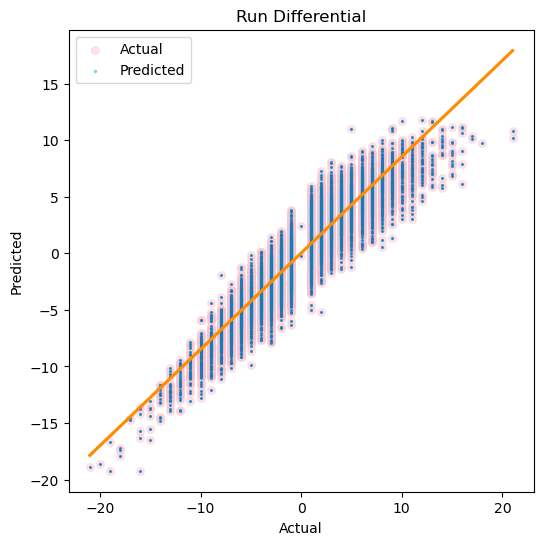

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(y_val, preds, color='pink', label='Actual' ,alpha=.4, s=30)
plt.scatter(y_val, preds, color='skyblue', label='Predicted',s=2)
sns.regplot(x=y_val, y =preds, scatter_kws={'s': 1}, line_kws={'color':'darkorange'}, ci=None)
plt.title('Run Differential')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend();